In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import pickle
import dask.dataframe as dd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
import scipy.stats as stats
from scipy.stats import pearsonr
import numpy as np
import allel

/home/tbellagio/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
final_ter = pd.read_csv('../final_gen.csv')['sample_name']

In [3]:
final_ter_siteplot = final_ter.str.split('_').str[0] + '_' + final_ter.str.split('_').str[2]

In [4]:
for split_number in range(2):
    file_pred_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/pred_ecotype_freq.csv' 

In [5]:
vcf_file = '/carnegie/nobackup/scratch/xwu/grenet/hapFIRE_updatedVCF/greneNet_final_v1.1_LDpruned.recode.vcf'
vcf = allel.read_vcf(vcf_file)

In [6]:
samples = vcf['samples']
samples = samples.astype(int)

In [7]:
founder_ef = pd.read_csv('/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/ecotype_founder_frequency.txt', header=None)
founder_ef.index = samples
founder_ef.index = founder_ef.index.astype(int)
founder_ef_series = founder_ef.squeeze()

In [8]:
path_ecotypes_freq = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_ecotype_frequency.txt'
real_ef = pd.read_csv(path_ecotypes_freq,sep='\t', usecols=final_ter)
real_ef.columns = pd.Series(real_ef.columns).str.split('_').str[0] + '_' + pd.Series(real_ef.columns).str.split('_').str[2]
real_ef.index = samples

In [9]:
real_ef.to_csv('chat_gpt_ecotype_freq.csv')

In [10]:
file_pred_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{1}/delta_p/pred_ecotype_freq.csv' 
pred_ecotypes_frequency = pd.read_csv(file_pred_ef)
pred_ecotypes_frequency = pred_ecotypes_frequency.set_index('Unnamed: 0')


In [11]:
pred_ecotypes_frequency

,2_1_8,2_1_9,2_1_11,2_1_12,2_2_5,2_2_6,2_2_7,11_1_4,11_1_8,11_1_9,...,48_3_1,48_3_2,48_3_3,48_3_4,48_3_6,48_3_8,48_3_9,48_3_10,48_3_11,48_3_12
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
10002,1.168424e-03,1.168424e-03,1.168424e-03,1.168424e-03,1.168424e-03,1.168424e-03,1.168424e-03,0.009035,0.009035,0.009035,...,1.409389e-02,1.409389e-02,1.409389e-02,1.409389e-02,1.409389e-02,1.409389e-02,1.409389e-02,1.409389e-02,1.409389e-02,1.409389e-02
10006,1.167022e-02,1.167022e-02,1.167022e-02,1.167022e-02,1.167022e-02,1.167022e-02,1.167022e-02,0.002376,0.002376,0.002376,...,2.618535e-07,2.618535e-07,2.618535e-07,2.618535e-07,2.618535e-07,2.618535e-07,2.618535e-07,2.618535e-07,2.618535e-07,2.618535e-07
10011,5.803583e-03,5.803583e-03,5.803583e-03,5.803583e-03,5.803583e-03,5.803583e-03,5.803583e-03,0.003424,0.003424,0.003424,...,2.010594e-03,2.010594e-03,2.010594e-03,2.010594e-03,2.010594e-03,2.010594e-03,2.010594e-03,2.010594e-03,2.010594e-03,2.010594e-03
10013,2.380571e-03,2.380571e-03,2.380571e-03,2.380571e-03,2.380571e-03,2.380571e-03,2.380571e-03,0.003657,0.003657,0.003657,...,6.167828e-08,6.167828e-08,6.167828e-08,6.167828e-08,6.167828e-08,6.167828e-08,6.167828e-08,6.167828e-08,6.167828e-08,6.167828e-08
10014,1.334885e-02,1.334885e-02,1.334885e-02,1.334885e-02,1.334885e-02,1.334885e-02,1.334885e-02,0.002685,0.002685,0.002685,...,1.062651e-07,1.062651e-07,1.062651e-07,1.062651e-07,1.062651e-07,1.062651e-07,1.062651e-07,1.062651e-07,1.062651e-07,1.062651e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100002,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,8.934494e-04,8.934494e-04,8.934494e-04,8.934494e-04,8.934494e-04,8.934494e-04,8.934494e-04,8.934494e-04,8.934494e-04,8.934494e-04
6939,4.508848e-03,4.508848e-03,4.508848e-03,4.508848e-03,4.508848e-03,4.508848e-03,4.508848e-03,0.004042,0.004042,0.004042,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9940,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000914,0.000914,0.000914,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [12]:
#ecotypes_m = pd.read_csv('ecotype_terminal_frequencies_wide_raw.csv').drop('Unnamed: 0',axis=1)
#ecotypes_m
#ecotypes_m = ecotypes_m.set_index('site_rep').T
#ecotypes_m.index = ecotypes_m.index.astype(int)
#(ecotypes_m[final_ter_siteplot].sort_index() == ecotypes_x[final_ter_siteplot].sort_index()).all().all()

In [13]:
p1overp0_real = real_ef.div(founder_ef_series, axis=0).sort_index()

In [14]:
deltap_real = real_ef.sub(founder_ef_series, axis=0).sort_index()

In [15]:
spcorrelation_ef = {}

for split_number in range(100):
    #output_file_sp_p1p0 = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/sp_corr_p1overp0.csv' 
    file_pred_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/pred_ecotype_freq.csv' 
    pred_ecotypes_frequency = pd.read_csv(file_pred_ef)
    pred_ecotypes_frequency = pred_ecotypes_frequency.set_index('Unnamed: 0')

    pred_p1overp0 = pred_ecotypes_frequency.div(founder_ef_series, axis=0)
    ## convert the columns of the prediciton into just plot_site because the real values are in those terms 
    test_samples_mod = pd.Series(pred_p1overp0.columns).str.split('_').str[0] + '_' + pd.Series(pred_p1overp0.columns).str.split('_').str[2]
    pred_p1overp0.columns = test_samples_mod

    ## bring the real values 
    real_ef_test = p1overp0_real[test_samples_mod]
    
    #print((real_ef_test.columns == pred_p1overp0.columns).all())
    
    for i in real_ef_test.columns:
        both = pd.concat([real_ef_test[i], pred_p1overp0[i]],axis=1)

        both.columns = ['real', 'pred'] 
        #sns.regplot(both, y = 'pred', x = 'real')
        both = both.sort_values('pred')
        # Get the ranks of the data
        X_ranked = both['real']
        y_ranked = both['pred']
    
        # Compute Spearman's rank correlation
        correlation, _ = pearsonr(X_ranked, y_ranked)
        spcorrelation_ef[i + '_split_' + str(split_number)] = correlation        

In [16]:
spcorrelation_ef = pd.DataFrame(list(spcorrelation_ef.items()), columns=['Index', 'Value'])
spcorrelation_ef.columns = ['sample', 'r2'] 

In [17]:
spcorrelation_ef['sample'].str.split('_')

0          [4, 4, split, 0]
1          [4, 1, split, 0]
2          [4, 2, split, 0]
3          [4, 3, split, 0]
4          [4, 5, split, 0]
               ...         
6856     [54, 8, split, 99]
6857     [54, 9, split, 99]
6858    [54, 10, split, 99]
6859    [54, 11, split, 99]
6860    [54, 12, split, 99]
Name: sample, Length: 6861, dtype: object

In [18]:
spcorrelation_ef['site'] = spcorrelation_ef['sample'].str.split('_').str[0]
#spcorrelation_ef['site'] = spcorrelation_ef['sample'].str.split('_').str[]

In [19]:
spcorrelation_ef['split'] = spcorrelation_ef['sample'].str.split('_').str[3]

In [20]:
spcorrelation_ef[spcorrelation_ef['site']=='27'].split.unique()

array(['5', '6', '9', '10', '13', '21', '36', '37', '38', '41', '43',
       '45', '68', '71', '72', '76', '77', '79', '87'], dtype=object)

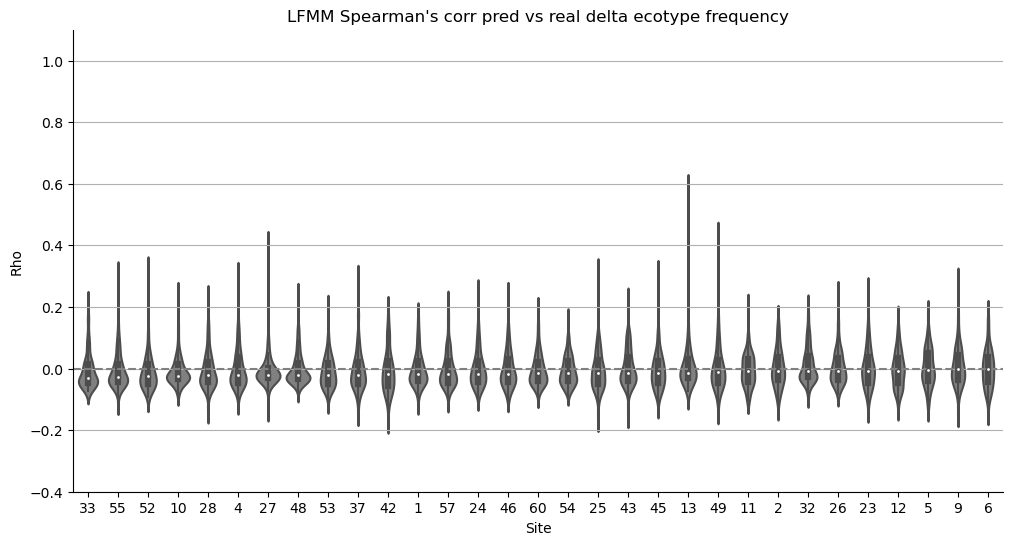

In [21]:
medians = spcorrelation_ef.groupby('site')['r2'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=spcorrelation_ef, y='r2', x='site', order=medians.index, color = 'Grey')

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
plt.ylim(-0.4, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

# Optionally, add labels or a title
plt.title('LFMM Spearman\'s corr pred vs real delta ecotype frequency')
plt.xlabel('Site')
plt.ylabel('Rho')
plt.savefig('LFMM_sp.png')
# Show the plot
plt.show()

In [22]:
spcorrelation_ef = {}
for split_number in range(100):
    #output_file_sp_p1p0 = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/sp_corr_p1overp0.csv' 
    file_pred_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/pred_ecotype_freq.csv' 
    pred_ecotypes_frequency = pd.read_csv(file_pred_ef)
    pred_ecotypes_frequency = pred_ecotypes_frequency.set_index('Unnamed: 0')

    pred_deltap = pred_ecotypes_frequency.sub(founder_ef_series, axis=0)
    ## convert the columns of the prediciton into just plot_site because the real values are in those terms 
    test_samples_mod = pd.Series(pred_deltap.columns).str.split('_').str[0] + '_' + pd.Series(pred_deltap.columns).str.split('_').str[2]
    pred_deltap.columns = test_samples_mod

    ## bring the real values 
    real_ef_test = deltap_real[test_samples_mod]
    
    #print((pred_deltap.columns == real_ef_test.columns).all())
    

    for i in real_ef_test.columns:
        both = pd.concat([real_ef_test[i], pred_deltap[i]],axis=1)

        both.columns = ['real', 'pred'] 
        #sns.regplot(both, y = 'pred', x = 'real')
        both = both.sort_values('pred')
        # Get the ranks of the data
        X_ranked = both['real']
        y_ranked = both['pred']
    
        # Compute Spearman's rank correlation
        correlation, _ = pearsonr(X_ranked, y_ranked)
        spcorrelation_ef[i + '_split_' + str(split_number)] = correlation

In [23]:
spcorrelation_ef = pd.DataFrame(list(spcorrelation_ef.items()), columns=['Index', 'Value'])
spcorrelation_ef.columns = ['sample', 'r2'] 

spcorrelation_ef['site'] = spcorrelation_ef['sample'].str.split('_').str[0]


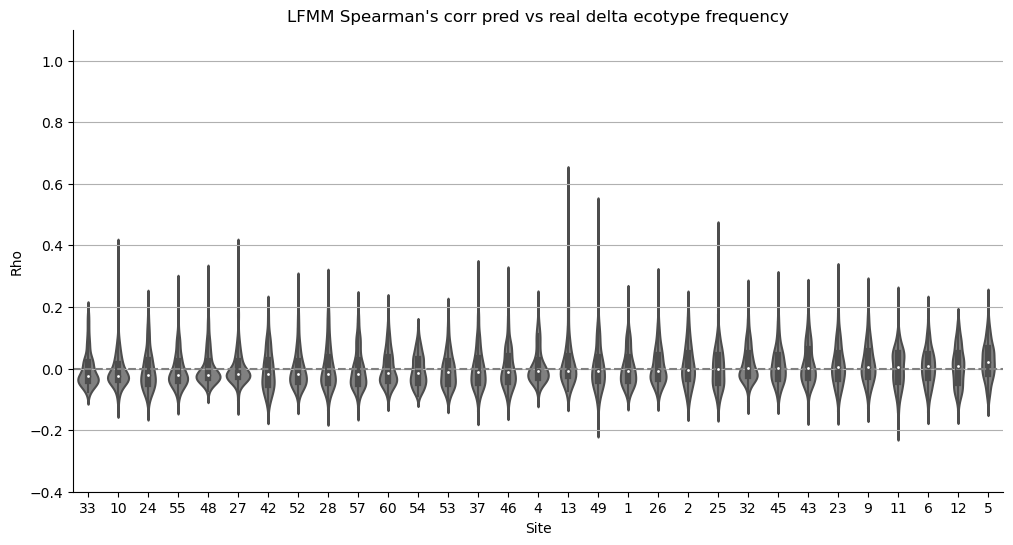

In [24]:
medians = spcorrelation_ef.groupby('site')['r2'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=spcorrelation_ef, y='r2', x='site', order=medians.index, color = 'Grey')

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
plt.ylim(-0.4, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

# Optionally, add labels or a title
plt.title('LFMM Spearman\'s corr pred vs real delta ecotype frequency')
plt.xlabel('Site')
plt.ylabel('Rho')
plt.savefig('LFMM_sp.png')
# Show the plot
plt.show()

In [25]:
spcorrelation_ef = {}

for split_number in range(100):
    #output_file_sp_p1p0 = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/sp_corr_p1overp0.csv' 
    file_pred_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/pred_ecotype_freq.csv' 
    pred_ecotypes_frequency = pd.read_csv(file_pred_ef)
    pred_ecotypes_frequency = pred_ecotypes_frequency.set_index('Unnamed: 0')

    ## convert the columns of the prediciton into just plot_site because the real values are in those terms 
    test_samples_mod = pd.Series(pred_ecotypes_frequency.columns).str.split('_').str[0] + '_' + pd.Series(pred_ecotypes_frequency.columns).str.split('_').str[2]
    pred_ecotypes_frequency.columns = test_samples_mod

    ## bring the real values 
    real_ef_test = real_ef[test_samples_mod]
    
    #print((real_ef_test.columns == pred_p1overp0.columns).all())
    
    for i in real_ef_test.columns:
        both = pd.concat([real_ef_test[i], pred_ecotypes_frequency[i]],axis=1)

        both.columns = ['real', 'pred'] 
        #sns.regplot(both, y = 'pred', x = 'real')
        both = both.sort_values('pred')
        # Get the ranks of the data
        X_ranked = both['real']
        y_ranked = both['pred']
    
        # Compute Spearman's rank correlation
        correlation, _ = pearsonr(X_ranked, y_ranked)
        spcorrelation_ef[i + '_split_' + str(split_number)] = correlation      

In [26]:
spcorrelation_ef = pd.DataFrame(list(spcorrelation_ef.items()), columns=['Index', 'Value'])
spcorrelation_ef.columns = ['sample', 'r2'] 

spcorrelation_ef['site'] = spcorrelation_ef['sample'].str.split('_').str[0]

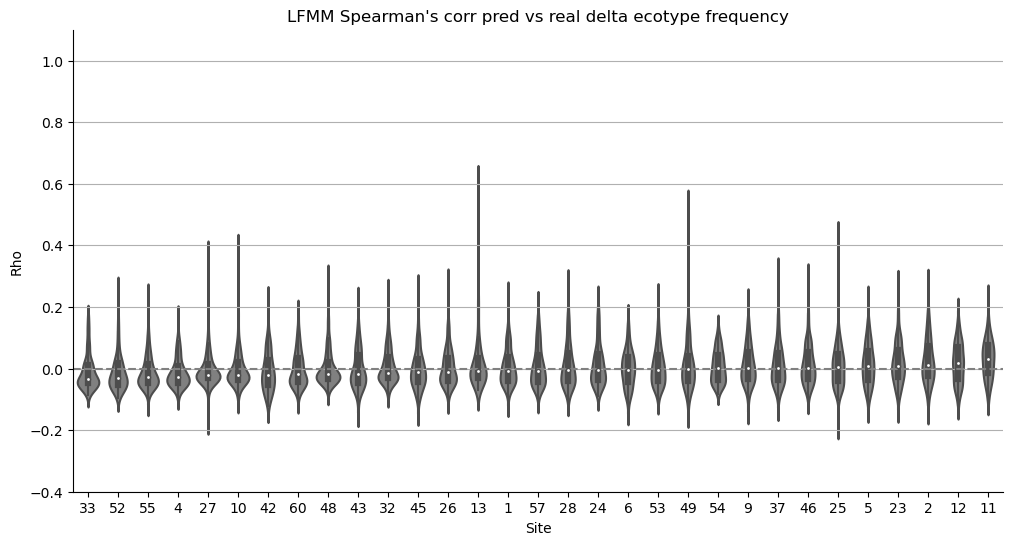

In [27]:
medians = spcorrelation_ef.groupby('site')['r2'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=spcorrelation_ef, y='r2', x='site', order=medians.index, color = 'Grey')

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
plt.ylim(-0.4, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

# Optionally, add labels or a title
plt.title('LFMM Spearman\'s corr pred vs real delta ecotype frequency')
plt.xlabel('Site')
plt.ylabel('Rho')
plt.savefig('LFMM_sp.png')
# Show the plot
plt.show()

In [ ]:
split_number = 5 

In [171]:

#output_file_sp_p1p0 = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/sp_corr_p1overp0.csv' 
file_pred_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/pred_ecotype_freq.csv' 
pred_ecotypes_frequency = pd.read_csv(file_pred_ef)
pred_ecotypes_frequency = pred_ecotypes_frequency.set_index('Unnamed: 0')
test_samples_mod = pd.Series(pred_ecotypes_frequency.columns).str.split('_').str[0] + '_' + pd.Series(pred_ecotypes_frequency.columns).str.split('_').str[2]
pred_ecotypes_frequency.columns = test_samples_mod

In [172]:
pred_ecotypes_frequency_site27 = pred_ecotypes_frequency[pred_ecotypes_frequency.columns[pred_ecotypes_frequency.columns.str.startswith('27_')]]

In [173]:
pred_ecotypes_frequency_site27

,27_2,27_3,27_5,27_1,27_4,27_6,27_7,27_8,27_9,27_10,27_11,27_12
Unnamed: 0,,,,,,,,,,,,
10002,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08,3.597140e-08
10006,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10011,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08,5.516062e-08
10013,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08,7.146820e-08
10014,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
100002,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02,5.220234e-02
6939,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9940,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [174]:
founder_ef_series

10002     0.006590
10006     0.003743
10011     0.003077
10013     0.004072
10014     0.004202
            ...   
100002    0.001702
6939      0.003251
9940      0.001544
9977      0.002353
9992      0.002553
Name: 0, Length: 231, dtype: float64

In [175]:
pred_deltap_site27 = pred_ecotypes_frequency_site27.sub(founder_ef_series, axis=0)

In [176]:
pred_p1overp0_site27 = pred_ecotypes_frequency_site27.div(founder_ef_series, axis=0)

In [181]:
deltap_real_site27 = deltap_real[deltap_real.columns[deltap_real.columns.str.startswith('27_')]]

In [182]:
p1overp0_real_site27 = p1overp0_real[p1overp0_real.columns[p1overp0_real.columns.str.startswith('27_')]]

In [29]:
deltap_real_site27.to_csv('site27_real.csv')

NameError: name 'deltap_real_site27' is not defined

0.62017237002581


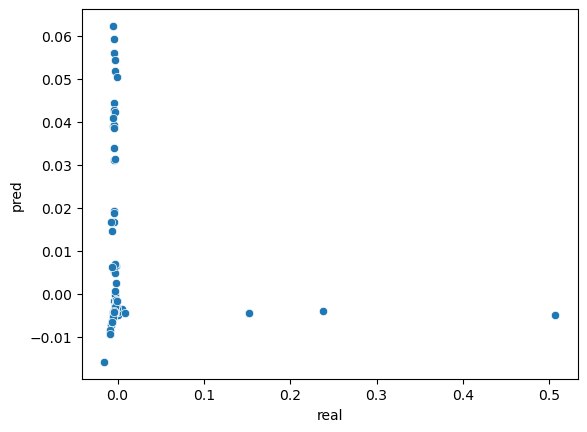

0.6978591872894722


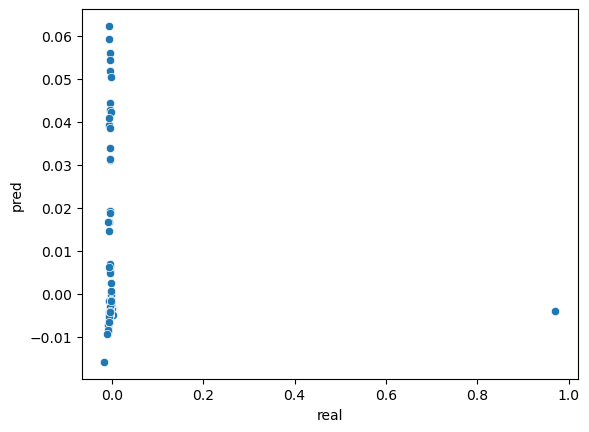

0.6779600459510505


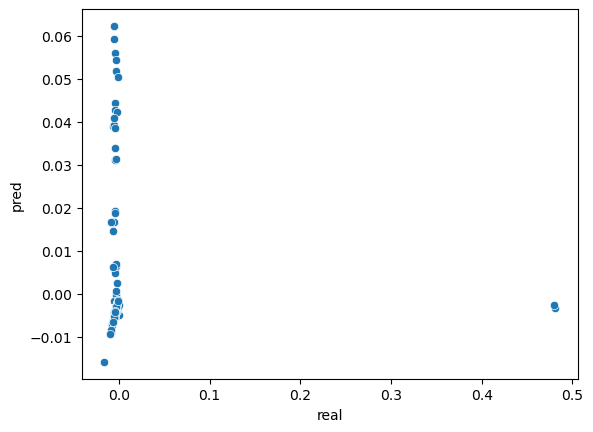

0.7129297476902381


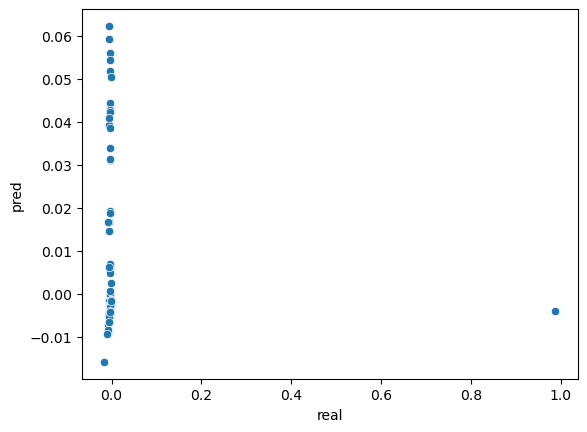

0.6786580735606224


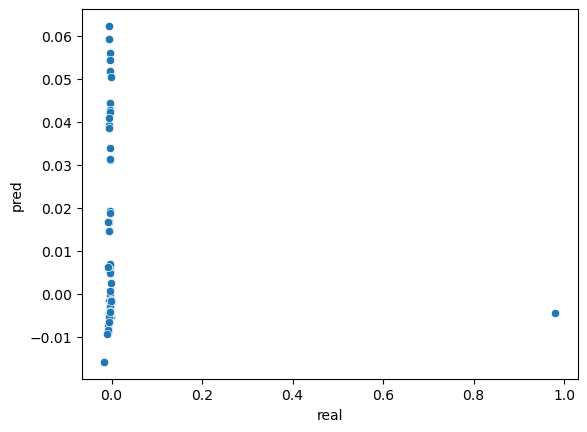

0.6995541190443739


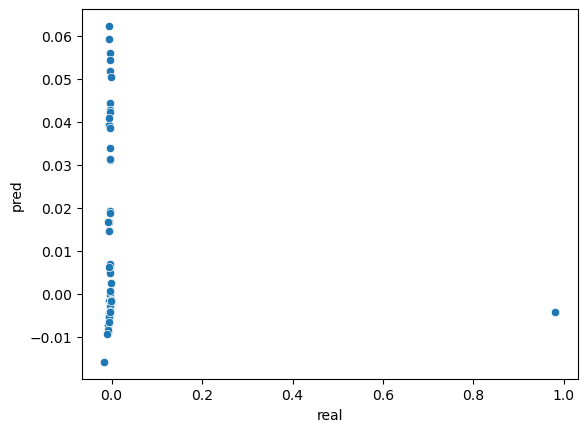

0.6671524628479294


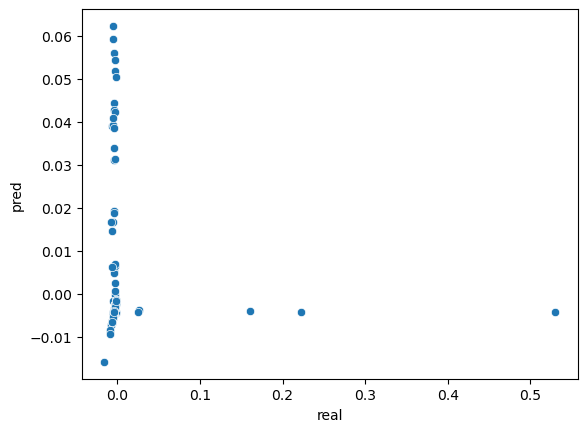

0.6426090467613089


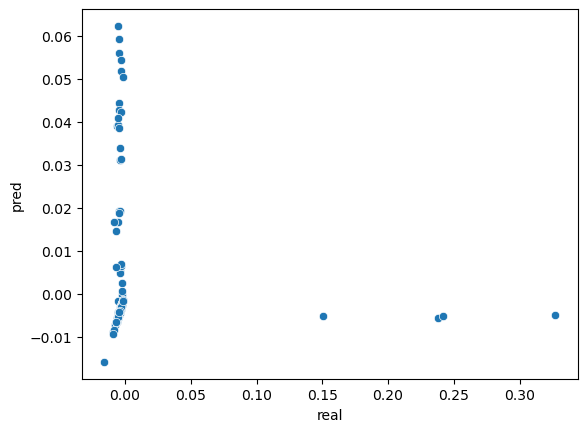

0.7162104012928602


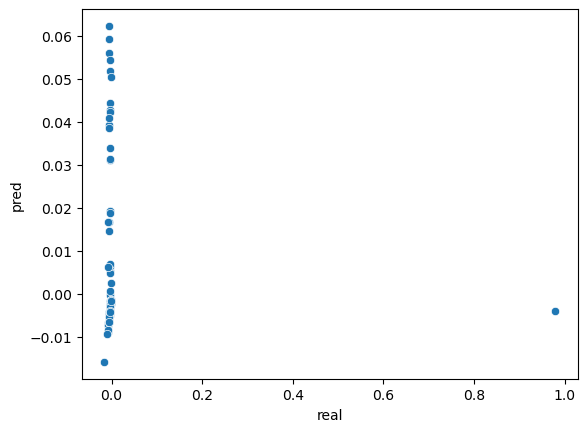

0.691701720171198


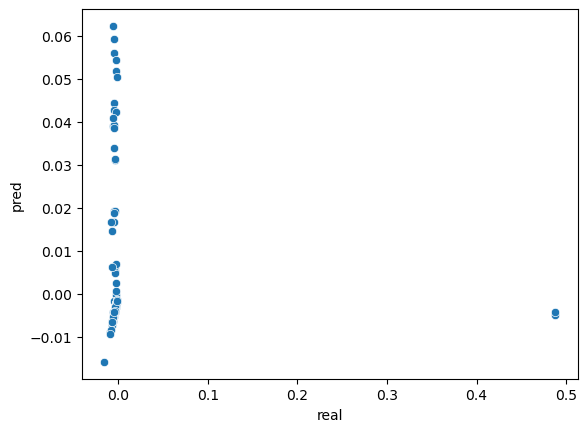

0.6706886816332094


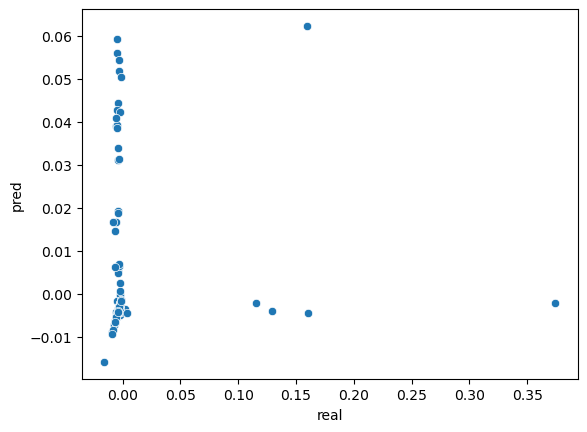

0.6769095971494773


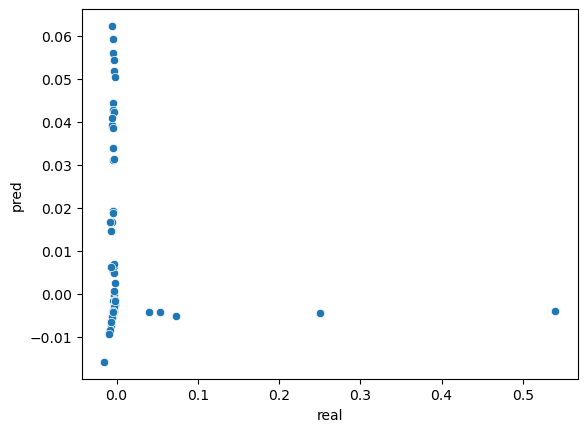

In [191]:
for i in deltap_real_site27.columns:
    both = pd.concat([deltap_real_site27[i], pred_deltap_site27[i]],axis=1)
    both.columns = ['real', 'pred']
    correlation, _ = spearmanr(both['real'], both['pred'])
    print(correlation)
    sns.scatterplot(data = both , x = 'real', y = 'pred')
    plt.show()

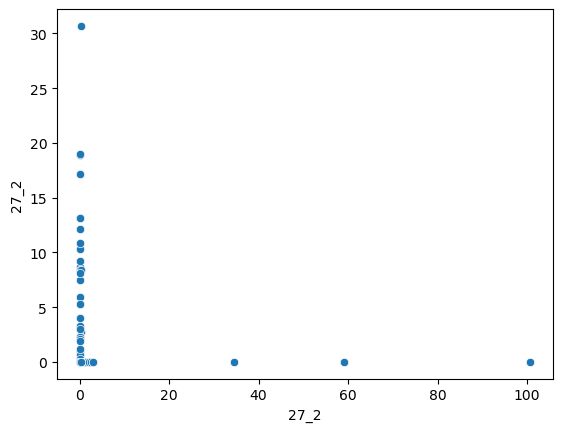

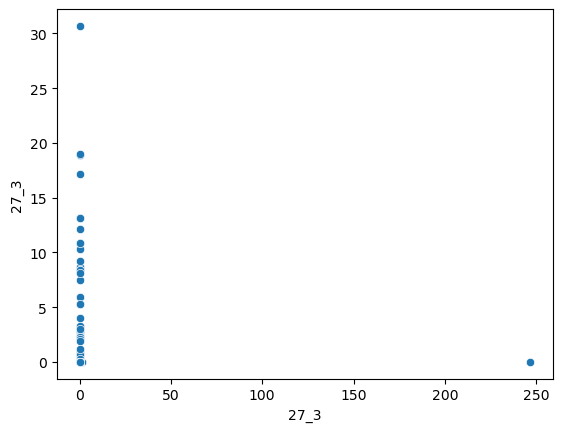

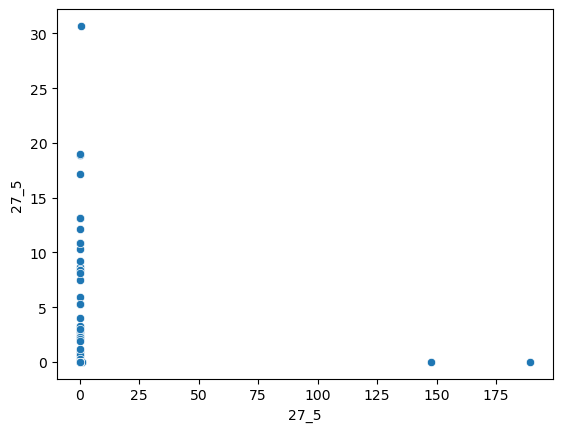

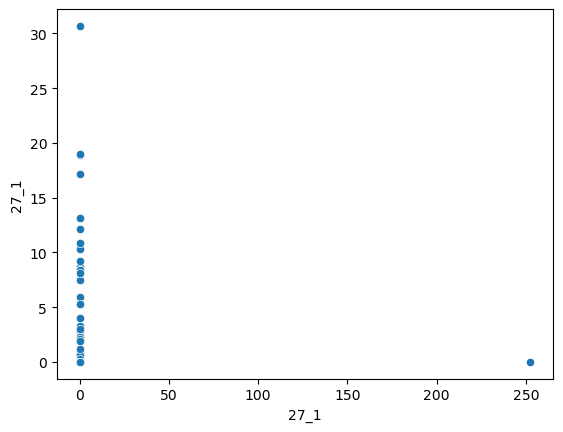

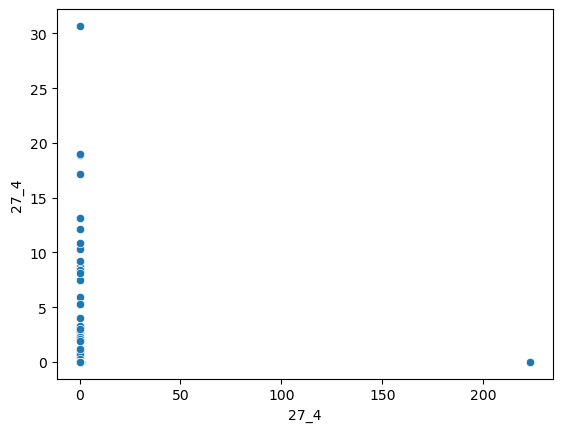

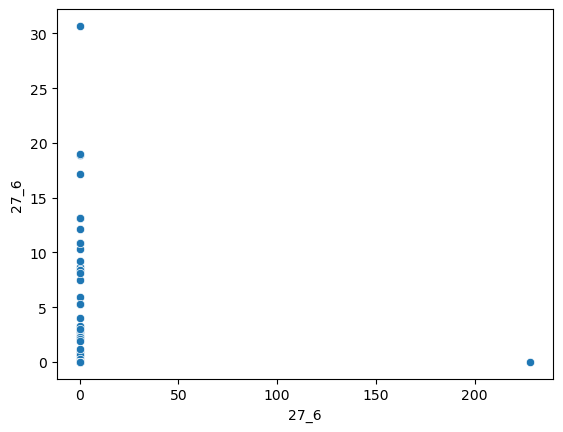

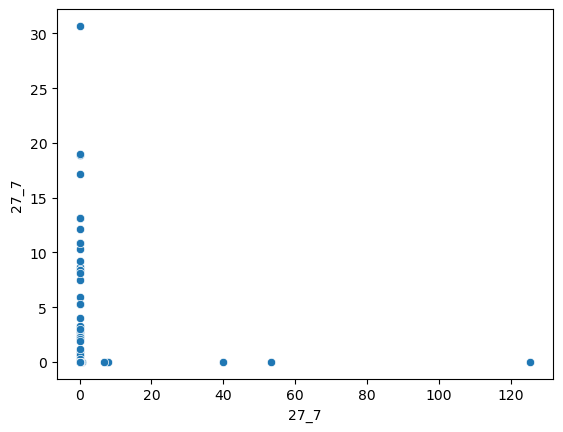

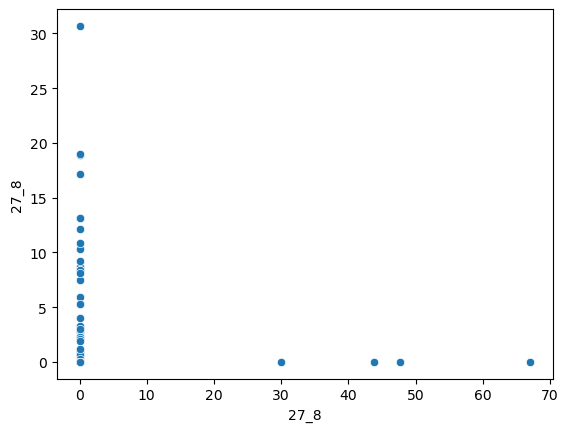

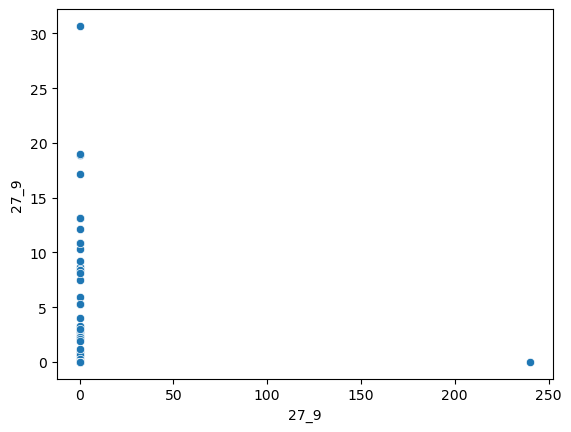

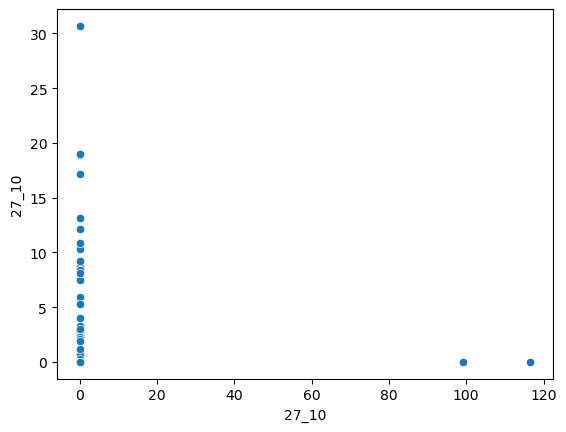

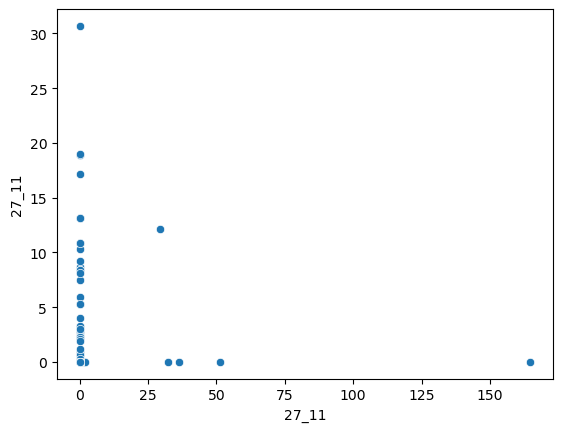

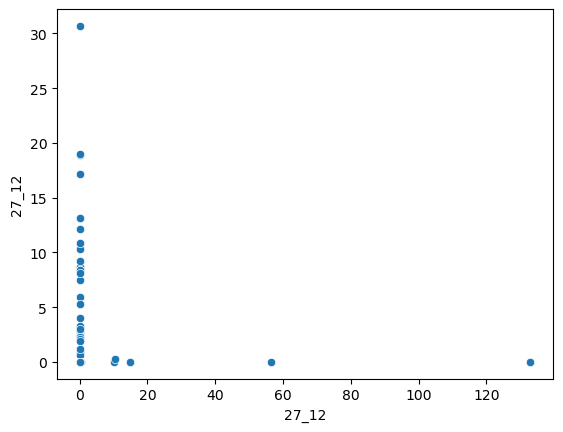

In [186]:
for i in p1overp0_real_site27.columns:
    sns.scatterplot(x = p1overp0_real_site27[i], y = pred_p1overp0_site27[i])
    plt.show()

In [183]:
p1overp0_real_site27

,27_2,27_3,27_5,27_1,27_4,27_6,27_7,27_8,27_9,27_10,27_11,27_12
159,0.048486,0.028557,0.009964,0.000000,0.028763,0.035337,0.021743,0.036981,0.023627,0.041501,0.012430,0.031215
265,0.006832,0.045031,0.127329,0.018944,0.021118,0.000000,0.022619,0.022516,0.037267,0.028106,0.008696,0.026273
763,0.090202,0.025083,0.037986,0.000000,0.000000,0.022430,0.002774,0.012722,0.000000,0.000000,0.030952,0.000000
765,0.347005,0.000000,0.011177,0.000000,0.000000,0.000000,0.000000,0.008316,0.000000,0.000000,0.107419,0.000000
766,0.475184,0.000000,0.000000,0.030488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.205000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10011,0.133561,0.020148,0.000000,0.058494,0.000000,0.000000,0.058331,0.000000,0.000000,0.000000,0.093753,0.000000
10013,0.000000,0.000000,0.012526,0.000000,0.000000,0.000000,0.000000,0.021122,0.000000,0.000000,0.000000,0.000000
10014,0.000000,0.000000,0.000000,0.000000,0.000000,0.028798,0.006029,0.015470,0.025466,0.000000,0.000000,0.018611
100001,0.235673,0.146784,0.285965,0.000000,0.153216,0.149123,0.104971,0.122222,0.227485,0.135380,0.189181,0.176608


In [178]:
pred_deltap_site27

,27_2,27_3,27_5,27_1,27_4,27_6,27_7,27_8,27_9,27_10,27_11,27_12
Unnamed: 0,,,,,,,,,,,,
10002,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590,-0.006590
10006,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743,-0.003743
10011,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077,-0.003077
10013,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072,-0.004072
10014,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202,-0.004202
...,...,...,...,...,...,...,...,...,...,...,...,...
100002,0.050501,0.050501,0.050501,0.050501,0.050501,0.050501,0.050501,0.050501,0.050501,0.050501,0.050501,0.050501
6939,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251,-0.003251
9940,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544,-0.001544


In [177]:
pred_p1overp0_site27

,27_2,27_3,27_5,27_1,27_4,27_6,27_7,27_8,27_9,27_10,27_11,27_12
Unnamed: 0,,,,,,,,,,,,
10002,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005
10006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10011,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
10013,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
10014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
100002,30.680186,30.680186,30.680186,30.680186,30.680186,30.680186,30.680186,30.680186,30.680186,30.680186,30.680186,30.680186
6939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
p1overp0_real deltap_real